<a href="https://colab.research.google.com/github/SumanGudikandula/FakeJobPrediction/blob/main/Fakejobprediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_json (r'News_Category_Dataset_v2.json', lines=True)
data = data.loc[data['category'].isin(['POLITICS','CRIME','WELLNESS'])]

In [ ]:
data.head(20)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,2018-05-26
18,POLITICS,Ryan Zinke Looks To Reel Back Some Critics Wit...,Chris D'Angelo,https://www.huffingtonpost.com/entry/ryan-zink...,The interior secretary attempts damage control...,2018-05-26
19,POLITICS,Trump's Scottish Golf Resort Pays Women Signif...,Mary Papenfuss,https://www.huffingtonpost.com/entry/trump-sco...,And there are four times as many male as femal...,2018-05-26
30,POLITICS,"Jack Johnson Was Pardoned, But Taboo Sex Is St...",Jenavieve Hatch,https://www.huffingtonpost.com/entry/jack-john...,A new law to fight sex trafficking targets som...,2018-05-25
32,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,Carla Herreria,https://www.huffingtonpost.com/entry/rachel-do...,"State prosecutors say almost $84,000 had been ...",2018-05-25


In [ ]:
def map_categories_to_integers(data):
  data['category'] = data['category'].astype('category')
  data['category_id'] = data['category'].cat.codes
  Unique_Categories_df = data[['category_id','category']].drop_duplicates().sort_values(by=['category_id','category'])
  return Unique_Categories_df.to_string(index=False)

In [ ]:
print(map_categories_to_integers(data))

 category_id category
           0    CRIME
           1 POLITICS
           2 WELLNESS


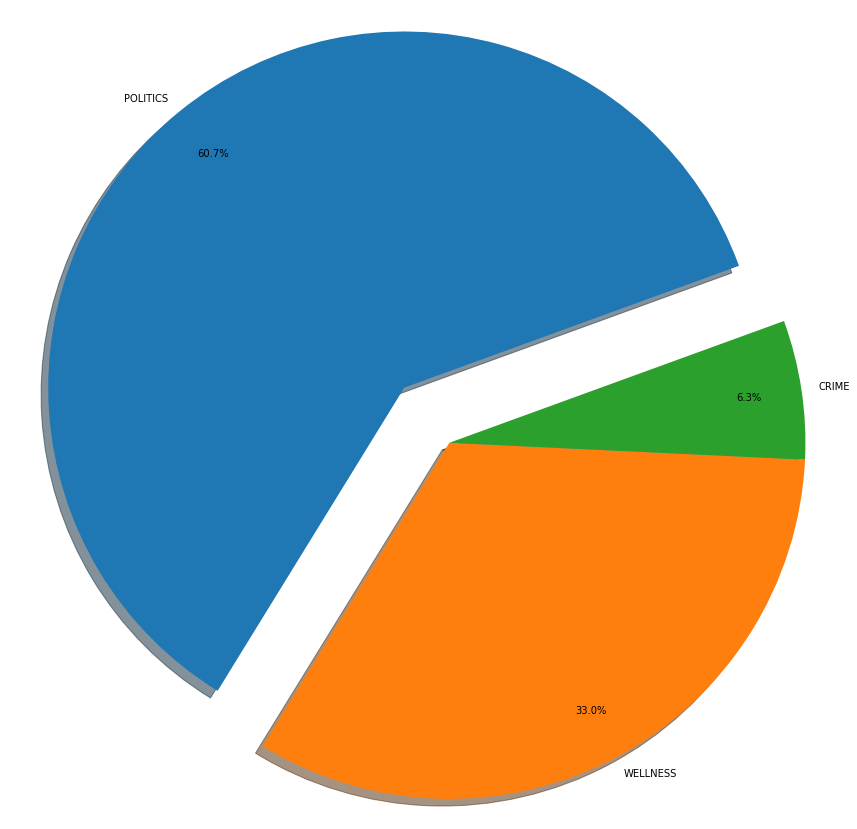

In [ ]:
plt.figure(figsize=(15,15))
sizes = data.category.value_counts().values
labels = data.category.value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20, 
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

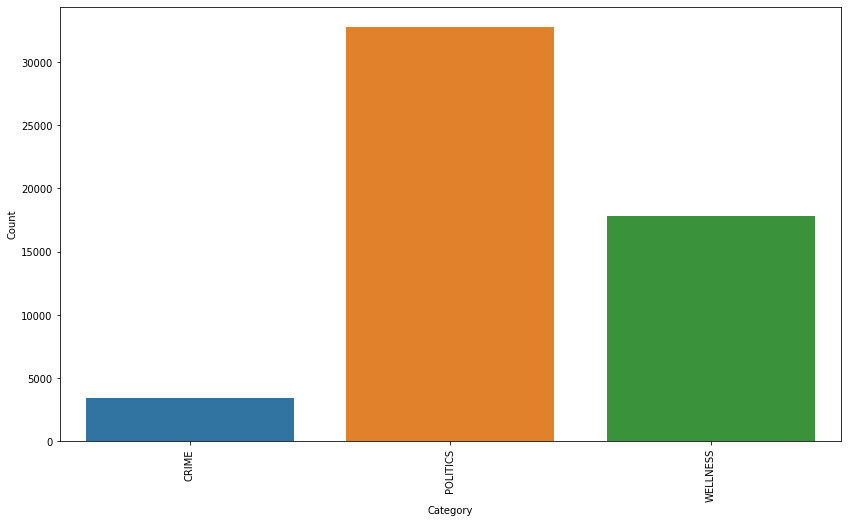

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,8))
count = data.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
def Merge_Similar_Categories(row):
    if row['category'] == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif row['category'] == 'PARENTING':
        return 'PARENTS'
    elif row['category'] == 'ARTS' or row['category'] == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif row['category'] == 'STYLE':
        return 'STYLE & BEAUTY'
    elif row['category'] == 'COLLEGE':
        return 'EDUCATION'
    elif row['category'] == 'TASTE':
        return 'FOOD & DRINK'
    else:
        return row['category']
data['category'] = data.apply(Merge_Similar_Categories, 1)

In [ ]:
print(map_categories_to_integers(data))

 category_id category
           0    CRIME
           1 POLITICS
           2 WELLNESS


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

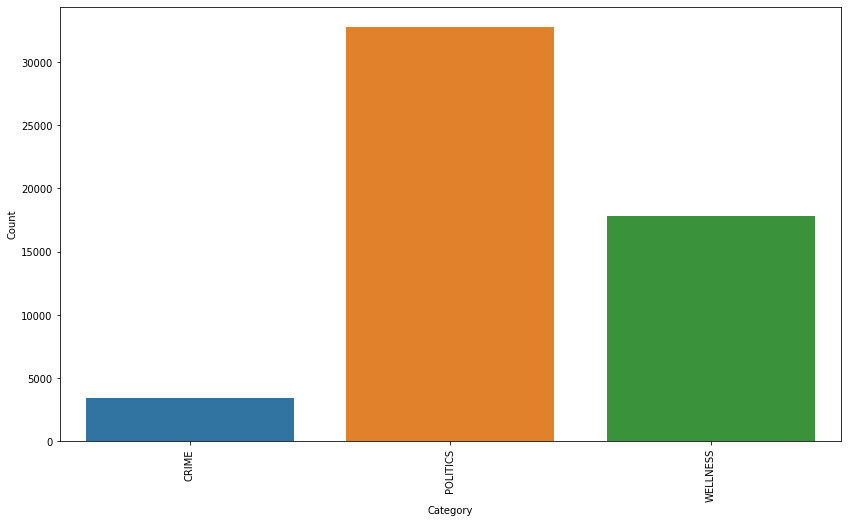

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,8))
count = data.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
print(data[['authors','category','category_id']].head(20))

                         authors  category  category_id
0                Melissa Jeltsen     CRIME            0
13  Elise Foley and Roque Planas  POLITICS            1
14   Michael Isikoff, Yahoo News  POLITICS            1
15                Mary Papenfuss  POLITICS            1
16                Mary Papenfuss  POLITICS            1
17                 Laura Bassett  POLITICS            1
18                Chris D'Angelo  POLITICS            1
19                Mary Papenfuss  POLITICS            1
30               Jenavieve Hatch  POLITICS            1
32                Carla Herreria     CRIME            0
33               Carol Kuruvilla  POLITICS            1
36                   Marina Fang  POLITICS            1
40                Jenna Amatulli     CRIME            0
42                   Marina Fang     CRIME            0
58                Mary Papenfuss  POLITICS            1
59             Sebastian Murdock  POLITICS            1
60                Mary Papenfuss  POLITICS      

In [ ]:
data['authors'] = data['authors'].str.lower()
data['authors'] = data['authors'].str.split(',', expand=True)[0]

In [ ]:
print(data[['authors','category','category_id']].head(20))

                         authors  category  category_id
0                melissa jeltsen     CRIME            0
13  elise foley and roque planas  POLITICS            1
14               michael isikoff  POLITICS            1
15                mary papenfuss  POLITICS            1
16                mary papenfuss  POLITICS            1
17                 laura bassett  POLITICS            1
18                chris d'angelo  POLITICS            1
19                mary papenfuss  POLITICS            1
30               jenavieve hatch  POLITICS            1
32                carla herreria     CRIME            0
33               carol kuruvilla  POLITICS            1
36                   marina fang  POLITICS            1
40                jenna amatulli     CRIME            0
42                   marina fang     CRIME            0
58                mary papenfuss  POLITICS            1
59             sebastian murdock  POLITICS            1
60                mary papenfuss  POLITICS      

In [ ]:
len(data['authors'].unique())

7553

In [ ]:
data.drop(columns=['link','date'], axis=1)
data['description'] = data['headline'] + ' ' + data['short_description']

In [ ]:
#prohibitedWords = [' i ', ' me ', ' my ', ' myself ', ' we ', ' our ', ' ours ', ' ourselves ', ' you ', "you're", "you've", "you'll", "you'd", ' your ', ' yours ', ' yourself ', ' yourselves ', ' he ', ' him ', ' his ', ' himself ', ' she ', "she's", ' her ', ' hers ', ' herself ', ' it ', "it's", ' its ', ' itself ', ' they ', ' them ', ' their ', ' theirs ', ' themselves ', ' what ', ' which ', ' who ', ' whom ', ' this ', ' that ', "that'll", ' these ', ' those ', ' am ', ' is ', ' are ', ' was ', ' were ', ' be ', ' been ', ' being ', ' have ', ' has ', ' had ', ' having ', ' do ', ' does ', ' did ', ' doing ', ' a ', ' an ', ' the ', ' and ', ' but ', ' if ', ' or ', ' because ', ' as ', ' until ', ' while ', ' of ', ' at ', ' by ', ' for ', ' with ', ' about ', ' against ', ' between ', ' into ', ' through ', ' during ', ' before ', ' after ', ' above ', ' below ', ' to ', ' from ', ' up ', ' down ', ' in ', ' out ', ' on ', ' off ', ' over ', ' under ', ' again ', ' further ', ' then ', ' once ', ' here ', ' there ', ' when ', ' where ', ' why ', ' how ', ' all ', ' any ', ' both ', ' each ', ' few ', ' more ', ' most ', ' other ', ' some ', ' such ', ' no ', ' nor ', ' not ', ' only ', ' own ', ' same ', ' so ', ' than ', ' too ', ' very ', ' s ', ' t ', ' can ', ' will ', ' just ', ' don ', "dont ", ' should ', "should've", ' now ', ' d ', ' ll ', ' m ', ' o ', ' re ', ' ve ', ' y ', ' ain ', ' aren ', " arent ", ' couldn ', " couldnt ", ' didn ', " didnt ", ' doesn ', " doesnt ", ' hadn ', " hadnt ", ' hasn ', "hasnt ", ' haven ', "havent ", ' isn ', "isnt ", ' ma ', ' mightn ', "mightnt ", ' mustn ', "mustnt ", ' needn ', "neednt ", ' shan ', "shant ", ' shouldn ', "shouldnt ", ' wasn ', "wasnt ", ' weren ', "werent ", ' won ', "wont ", ' wouldn ', "wouldnt "]
prohibitedWords = [" 0o ", " 0s ", " 3a ", " 3b ", " 3d ", " 6b ", " 6o ", " a ", " a1 ", " a2 ", " a3 ", " a4 ", " ab ", " able ", " about ", " above ", " abst ", " ac ", " accordance ", " according ", " accordingly ", " across ", " act ", " actually ", " ad ", " added ", " adj ", " ae ", " af ", " affected ", " affecting ", " affects ", " after ", " afterwards ", " ag ", " again ", " against ", " ah ", " ain ", " aint ", " aj ", " al ", " all ", " allow ", " allows ", " almost ", " alone ", " along ", " already ", " also ", " although ", " always ", " am ", " among ", " amongst ", " amoungst ", " amount ", " an ", " and ", " announce ", " another ", " any ", " anybody ", " anyhow ", " anymore ", " anyone ", " anything ", " anyway ", " anyways ", " anywhere ", " ao ", " ap ", " apart ", " apparently ", " appear ", " appreciate ", " appropriate ", " approximately ", " ar ", " are ", " aren ", " arent ", " arent ", " arise ", " around ", " as ", " as ", " aside ", " ask ", " asking ", " associated ", " at ", " au ", " auth ", " av ", " available ", " aw ", " away ", " awfully ", " ax ", " ay ", " az ", " b ", " b1 ", " b2 ", " b3 ", " ba ", " back ", " bc ", " bd ", " be ", " became ", " because ", " become ", " becomes ", " becoming ", " been ", " before ", " beforehand ", " begin ", " beginning ", " beginnings ", " begins ", " behind ", " being ", " believe ", " below ", " beside ", " besides ", " best ", " better ", " between ", " beyond ", " bi ", " bill ", " biol ", " bj ", " bk ", " bl ", " bn ", " both ", " bottom ", " bp ", " br ", " brief ", " briefly ", " bs ", " bt ", " bu ", " but ", " bx ", " by ", " c ", " c1 ", " c2 ", " c3 ", " ca ", " call ", " came ", " can ", " cannot ", " cant ", " cant ", " cause ", " causes ", " cc ", " cd ", " ce ", " certain ", " certainly ", " cf ", " cg ", " ch ", " changes ", " ci ", " cit ", " cj ", " cl ", " clearly ", " cm ", " cmon ", " cn ", " co ", " com ", " come ", " comes ", " con ", " concerning ", " consequently ", " consider ", " considering ", " contain ", " containing ", " contains ", " corresponding ", " could ", " couldn ", " couldnt ", " couldnt ", " course ", " cp ", " cq ", " cr ", " cry ", " cs ", " cs ", " ct ", " cu ", " currently ", " cv ", " cx ", " cy ", " cz ", " d ", " d2 ", " da ", " date ", " dc ", " dd ", " de ", " definitely ", " describe ", " described ", " despite ", " detail ", " df ", " di ", " did ", " didn ", " didnt ", " different ", " dj ", " dk ", " dl ", " do ", " does ", " doesn ", " doesnt ", " doing ", " don ", " done ", " dont ", " down ", " downwards ", " dp ", " dr ", " ds ", " dt ", " du ", " due ", " during ", " dx ", " dy ", " e ", " e2 ", " e3 ", " ea ", " each ", " ec ", " ed ", " edu ", " ee ", " ef ", " effect ", " eg ", " ei ", " eight ", " eighty ", " either ", " ej ", " el ", " eleven ", " else ", " elsewhere ", " em ", " empty ", " en ", " end ", " ending ", " enough ", " entirely ", " eo ", " ep ", " eq ", " er ", " es ", " especially ", " est ", " et ", " et-al ", " etc ", " eu ", " ev ", " even ", " ever ", " every ", " everybody ", " everyone ", " everything ", " everywhere ", " ex ", " exactly ", " example ", " except ", " ey ", " f ", " f2 ", " fa ", " far ", " fc ", " few ", " ff ", " fi ", " fifteen ", " fifth ", " fify ", " fill ", " find ", " fire ", " first ", " five ", " fix ", " fj ", " fl ", " fn ", " fo ", " followed ", " following ", " follows ", " for ", " former ", " formerly ", " forth ", " forty ", " found ", " four ", " fr ", " from ", " front ", " fs ", " ft ", " fu ", " full ", " further ", " furthermore ", " fy ", " g ", " ga ", " gave ", " ge ", " get ", " gets ", " getting ", " gi ", " give ", " given ", " gives ", " giving ", " gj ", " gl ", " go ", " goes ", " going ", " gone ", " got ", " gotten ", " gr ", " greetings ", " gs ", " gy ", " h ", " h2 ", " h3 ", " had ", " hadn ", " hadnt ", " happens ", " hardly ", " has ", " hasn ", " hasnt ", " hasnt ", " have ", " haven ", " havent ", " having ", " he ", " hed ", " hed ", " hell ", " hello ", " help ", " hence ", " her ", " here ", " hereafter ", " hereby ", " herein ", " heres ", " heres ", " hereupon ", " hers ", " herself ", " hes ", " hes ", " hh ", " hi ", " hid ", " him ", " himself ", " his ", " hither ", " hj ", " ho ", " home ", " hopefully ", " how ", " howbeit ", " however ", " hows ", " hr ", " hs ", " http ", " hu ", " hundred ", " hy ", " i ", " i2 ", " i3 ", " i4 ", " i6 ", " i7 ", " i8 ", " ia ", " ib ", " ibid ", " ic ", " id ", " id ", " ie ", " if ", " ig ", " ignored ", " ih ", " ii ", " ij ", " il ", " ill ", " im ", " im ", " immediate ", " immediately ", " importance ", " important ", " in ", " inasmuch ", " inc ", " indeed ", " index ", " indicate ", " indicated ", " indicates ", " information ", " inner ", " insofar ", " instead ", " interest ", " into ", " invention ", " inward ", " io ", " ip ", " iq ", " ir ", " is ", " isn ", " isnt ", " it ", " itd ", " itd ", " itll ", " its ", " its ", " itself ", " iv ", " ive ", " ix ", " iy ", " iz ", " j ", " jj ", " jr ", " js ", " jt ", " ju ", " just ", " k ", " ke ", " keep ", " keeps ", " kept ", " kg ", " kj ", " km ", " know ", " known ", " knows ", " ko ", " l ", " l2 ", " la ", " largely ", " last ", " lately ", " later ", " latter ", " latterly ", " lb ", " lc ", " le ", " least ", " les ", " less ", " lest ", " let ", " lets ", " lets ", " lf ", " like ", " liked ", " likely ", " line ", " little ", " lj ", " ll ", " ll ", " ln ", " lo ", " look ", " looking ", " looks ", " los ", " lr ", " ls ", " lt ", " ltd ", " m ", " m2 ", " ma ", " made ", " mainly ", " make ", " makes ", " many ", " may ", " maybe ", " me ", " mean ", " means ", " meantime ", " meanwhile ", " merely ", " mg ", " might ", " mightn ", " mightnt ", " mill ", " million ", " mine ", " miss ", " ml ", " mn ", " mo ", " more ", " moreover ", " most ", " mostly ", " move ", " mr ", " mrs ", " ms ", " mt ", " mu ", " much ", " mug ", " must ", " mustn ", " mustnt ", " my ", " myself ", " n ", " n2 ", " na ", " name ", " namely ", " nay ", " nc ", " nd ", " ne ", " near ", " nearly ", " necessarily ", " necessary ", " need ", " needn ", " neednt ", " needs ", " neither ", " never ", " nevertheless ", " new ", " next ", " ng ", " ni ", " nine ", " ninety ", " nj ", " nl ", " nn ", " no ", " nobody ", " non ", " none ", " nonetheless ", " noone ", " nor ", " normally ", " nos ", " not ", " noted ", " nothing ", " novel ", " now ", " nowhere ", " nr ", " ns ", " nt ", " ny ", " o ", " oa ", " ob ", " obtain ", " obtained ", " obviously ", " oc ", " od ", " of ", " off ", " often ", " og ", " oh ", " oi ", " oj ", " ok ", " okay ", " ol ", " old ", " om ", " omitted ", " on ", " once ", " one ", " ones ", " only ", " onto ", " oo ", " op ", " oq ", " or ", " ord ", " os ", " ot ", " other ", " others ", " otherwise ", " ou ", " ought ", " our ", " ours ", " ourselves ", " out ", " outside ", " over ", " overall ", " ow ", " owing ", " own ", " ox ", " oz ", " p ", " p1 ", " p2 ", " p3 ", " page ", " pagecount ", " pages ", " par ", " part ", " particular ", " particularly ", " pas ", " past ", " pc ", " pd ", " pe ", " per ", " perhaps ", " pf ", " ph ", " pi ", " pj ", " pk ", " pl ", " placed ", " please ", " plus ", " pm ", " pn ", " po ", " poorly ", " possible ", " possibly ", " potentially ", " pp ", " pq ", " pr ", " predominantly ", " present ", " presumably ", " previously ", " primarily ", " probably ", " promptly ", " proud ", " provides ", " ps ", " pt ", " pu ", " put ", " py ", " q ", " qj ", " qu ", " que ", " quickly ", " quite ", " qv ", " r ", " r2 ", " ra ", " ran ", " rather ", " rc ", " rd ", " re ", " readily ", " really ", " reasonably ", " recent ", " recently ", " ref ", " refs ", " regarding ", " regardless ", " regards ", " related ", " relatively ", " research ", " research-articl ", " respectively ", " resulted ", " resulting ", " results ", " rf ", " rh ", " ri ", " right ", " rj ", " rl ", " rm ", " rn ", " ro ", " rq ", " rr ", " rs ", " rt ", " ru ", " run ", " rv ", " ry ", " s ", " s2 ", " sa ", " said ", " same ", " saw ", " say ", " saying ", " says ", " sc ", " sd ", " se ", " sec ", " second ", " secondly ", " section ", " see ", " seeing ", " seem ", " seemed ", " seeming ", " seems ", " seen ", " self ", " selves ", " sensible ", " sent ", " serious ", " seriously ", " seven ", " several ", " sf ", " shall ", " shan ", " shant ", " she ", " shed ", " shed ", " shell ", " shes ", " shes ", " should ", " shouldn ", " shouldnt ", " shouldve ", " show ", " showed ", " shown ", " showns ", " shows ", " si ", " side ", " significant ", " significantly ", " similar ", " similarly ", " since ", " sincere ", " six ", " sixty ", " sj ", " sl ", " slightly ", " sm ", " sn ", " so ", " some ", " somebody ", " somehow ", " someone ", " somethan ", " something ", " sometime ", " sometimes ", " somewhat ", " somewhere ", " soon ", " sorry ", " sp ", " specifically ", " specified ", " specify ", " specifying ", " sq ", " sr ", " ss ", " st ", " still ", " stop ", " strongly ", " sub ", " substantially ", " successfully ", " such ", " sufficiently ", " suggest ", " sup ", " sure ", " sy ", " system ", " sz ", " t ", " t1 ", " t2 ", " t3 ", " take ", " taken ", " taking ", " tb ", " tc ", " td ", " te ", " tell ", " ten ", " tends ", " tf ", " th ", " than ", " thank ", " thanks ", " thanx ", " that ", " thatll ", " thats ", " thats ", " thatve ", " their ", " theirs ", " them ", " themselves ", " then ", " thence ", " there ", " thereafter ", " thereby ", " thered ", " therefore ", " therein ", " therell ", " thereof ", " therere ", " theres ", " theres ", " thereto ", " thereupon ", " thereve ", " these ", " they ", " theyd ", " theyd ", " theyll ", " theyre ", " theyre ", " theyve ", " thickv ", " thin ", " think ", " third ", " this ", " thorough ", " thoroughly ", " those ", " thou ", " though ", " thoughh ", " thousand ", " three ", " throug ", "through ", " throughout ", " thru ", " thus ", " ti ", " til ", " tip ", " tj ", " tl ", " tm ", " tn ", " to ", " together ", " too ", " took ", " top ", " toward ", " towards ", " tp ", " tq ", " tr ", " tried ", " tries ", " truly ", " try ", " trying ", " ts ", " ts ", " tt ", " tv ", " twelve ", " twenty ", " twice ", " two ", " tx ", " u ", " u201d ", " ue ", " ui ", " uj ", " uk ", " um ", " un ", " under ", " unfortunately ", " unless ", " unlike ", " unlikely ", " until ", " unto ", " uo ", " up ", " upon ", " ups ", " ur ", " us ", " use ", " used ", " useful ", " usefully ", " usefulness ", " uses ", " using ", " usually ", " ut ", " v ", " va ", " value ", " various ", " vd ", " ve ", " ve ", " very ", " via ", " viz ", " vj ", " vo ", " vol ", " vols ", " volumtype ", " vq ", " vs ", " vt ", " vu ", " w ", " wa ", " want ", " wants ", " was ", " wasn ", " wasnt ", " wasnt ", " way ", " we ", " wed ", " wed ", " welcome ", " well ", " well ", " well-b ", " went ", " were ", " were ", " weren ", " werent ", " werent ", " weve ", " what ", " whatever ", " whatll ", " whats ", " whats ", " when ", " whence ", " whenever ", " whens ", " where ", " whereafter ", " whereas ", " whereby ", " wherein ", " wheres ", " wheres ", " whereupon ", " wherever ", " whether ", " which ", " while ", " whim ", " whither ", " who ", " whod ", " whoever ", " whole ", " wholl ", " whom ", " whomever ", " whos ", " whos ", " whose ", " why ", " whys ", " wi ", " widely ", " will ", " willing ", " wish ", " with ", " within ", " without ", " wo ", " won ", " wonder ", " wont ", " wont ", " words ", " world ", " would ", " wouldn ", " wouldnt ", " wouldnt ", " www ", " x ", " x1 ", " x2 ", " x3 ", " xf ", " xi ", " xj ", " xk ", " xl ", " xn ", " xo ", " xs ", " xt ", " xv ", " xx ", " y ", " y2 ", " yes ", " yet ", " yj ", " yl ", " you ", " youd ", " youd ", " youll ", " your ", " youre ", " youre ", " yours ", " yourself ", " yourselves ", " youve ", " yr ", " ys ", " yt ", " z ", " zero ", " zi ", " zz "]

#Creating the regex model to eliminate the prohibit words.
big_regex = re.compile('|'.join(map(re.escape, prohibitedWords)))
def modify_description_fit_for_model(column_name):
    def Inner_function_custom_apply(row):
      row[column_name] = row[column_name].lower() 
      row[column_name] = re.sub(r"[^a-zA-Z0-9]+",' ',row[column_name])
      row[column_name] = re.sub(r'\s+',' ',row[column_name])
      row[column_name] = big_regex.sub(' ',row[column_name])
      if column_name == 'authors':
        row[column_name] = re.sub(' +','',row[column_name]).strip()
      else:
        row[column_name] = re.sub(' +',' ',row[column_name]).strip()
      row[column_name] = ' '.join( [w for w in set(row[column_name].split()) if (len(w)>2)])
      return row[column_name]
    data[column_name] = data.apply(Inner_function_custom_apply, 1)

In [ ]:

modify_description_fit_for_model('authors')
modify_description_fit_for_model('headline')
modify_description_fit_for_model('short_description')
modify_description_fit_for_model('description')

In [ ]:
display(data[['category','category_id','authors','short_description','headline','description']].head(20))

,category,category_id,authors,short_description,headline,description
0,CRIME,0,melissajeltsen,killed america children left day husband anoth...,there mass texas shootings week only,there killed america mass children another tex...
13,POLITICS,1,elisefoleyroqueplanas,had locate health government its month officia...,system crackdown immigrant kids puts strained ...,health children parents trump crackdown the re...
14,POLITICS,1,michaelisikoff,feature the convicted conversations wiretaps t...,concerned met ally son wiretaps trump fbi putin,convicted trump the son money fbi alexander ro...
15,POLITICS,1,marypapenfuss,warns count nsa the mueller whistleblower but ...,vladimir than putin snowden loves trump edward...,vladimir than count nsa the warns whistleblowe...
16,POLITICS,1,marypapenfuss,minute peeping just,spy hilariously claim booyah obama trolls phot...,spy hilariously claim booyah minute obama peep...
17,POLITICS,1,laurabassett,united women the travel irish end kingdom preg...,landslide referendum ireland votes repeal amen...,united landslide women the referendum ireland ...
18,POLITICS,1,chrisangelo,secretary control fishing didn the like groups...,some critics zinke pivot conservation reel rya...,critics hunting conservation attempts interior...
19,POLITICS,1,marypapenfuss,and female many times male are executives,men resort women less report pays scottish gol...,men there resort female women less many times ...
30,POLITICS,1,jenavievehatch,trafficking protect law fight people the sex t...,jack pardoned sex criminalized taboo johnson s...,jack new trafficking protect law fight pardone...
32,CRIME,0,carlaherreria,000 state been assistance public bank deposite...,dolezal welfare felony fraud charges faces rachel,state account she fraud charges public receivi...


In [ ]:
data.sample(frac=1).reset_index(drop=True)

,category,headline,authors,link,short_description,date,category_id,description
0,POLITICS,athletes fight state the black union trump racist,traviswaldron,https://www.huffingtonpost.com/entry/donald-tr...,thinly veiled national the take protested anth...,2018-01-31,1,veiled state speech nfl players trump thinly n...
1,WELLNESS,death meal auto,tiffgriff,https://www.huffingtonpost.com/entry/doa-death...,budding career part the rap what thinking favo...,2014-04-10,2,you budding career death know part the rap mea...
2,WELLNESS,how curb freak inner control,mequilibrium,https://www.huffingtonpost.com/entry/how-to-st...,trip instead can party imagine thing put ride ...,2013-09-14,2,trip curb freak inner instead can party imagin...
3,POLITICS,set first summer facility close rikers jail is...,sebastianmurdock,https://www.huffingtonpost.com/entry/first-rik...,nine part the plan island larger close facilities,2018-01-02,1,nine set first summer facility close the plan ...
4,WELLNESS,als raise study risk finds early balding,,https://www.huffingtonpost.com/entry/early-bal...,als one involve called receptor the androgen p...,2013-08-23,2,als raise study involve called receptor risk t...
...,...,...,...,...,...,...,...,...
53966,WELLNESS,editors living healthy powerhouses nutritional...,,https://www.huffingtonpost.com/entry/healthy-f...,edit how write articles nutrient many the rich...,2012-09-17,2,eats matter living the healthy rich powerhouse...
53967,POLITICS,stories metoo sex harassment share senators,marypapenfuss,https://www.huffingtonpost.com/entry/us-senato...,chased desk colleague sen elizabeth warren she,2017-10-23,1,stories chased desk metoo sex harassment colle...
53968,POLITICS,gun highlights shooting dallas obama for contr...,alanahorowitzsatlin,https://www.huffingtonpost.com/entry/obama-dal...,think that every are horrified speak american ...,2016-07-08,1,think single that gun every are speak highligh...
53969,POLITICS,martin malley asked bernie sanders debate,elisefoley,https://www.huffingtonpost.com/entry/martin-om...,malley national democratic schedule the please...,2015-12-29,1,martin malley national democratic pleased aske...


In [ ]:
train_data, dev_data, test_data = np.split(data, [int(0.8*len(data)), int(0.9*len(data))])

In [ ]:
print('Documents count of Training Data : ', len(data))
print('Documents count of Dev Data : ', len(dev_data))
print('Documents count of Test Data : ', len(test_data))

Documents count of Training Data :  53971
Documents count of Dev Data :  5397
Documents count of Test Data :  5398


In [ ]:
def Words_dictionary_builder(feature_class_data,type_func):
  Main_words_dict = {}
  for index, row in feature_class_data.iterrows():
    for i in row['feature'].split(' '):
      if i in Main_words_dict:
        Main_words_dict[i] = Main_words_dict[i] + 1
      else:
        Main_words_dict[i] = 1

  Main_words_dict= dict(sorted(Main_words_dict.items(), key = lambda x: x[1], reverse = True))
  
  if type_func == 2:
    Main_words_dict.pop('the')

  Class_Words_dict = {}
  for class_id in feature_class_data['class'].unique():
    Class_Words_dict[class_id] = dict.fromkeys(Main_words_dict, 0)
    for index,row in feature_class_data.loc[feature_class_data['class'] == class_id].iterrows():
      for i in row['feature'].split(' '):
        if i in Class_Words_dict[class_id]:
          Class_Words_dict[class_id][i] = Class_Words_dict[class_id][i] + 1
    Class_Words_dict[class_id] = dict(sorted(Class_Words_dict[class_id].items(), key = lambda x: x[1], reverse = True))
  return Main_words_dict,Class_Words_dict

In [ ]:
feature_class_data = pd.DataFrame(columns=['feature','class'])
feature_class_data[['feature','class']] = train_data[['description','category']]
Main_words_dict,Class_Words_dict = Words_dictionary_builder(feature_class_data,1)

In [ ]:
print('Total vocabulary list in Training Data : ', len(Main_words_dict))

Total vocabulary list in Training Data :  35113


In [ ]:
print('Vocabulary List: \n\n')
print(list(Main_words_dict.keys()))

Vocabulary List: 


['the', 'trump', 'donald', 'president', 'people', 'you', 'not', 'that', 'gop', 'clinton', 'his', 'obama', 'house', 'have', 'time', 'what', 'this', 'for', 'state', 'hillary', 'and', 'health', 'how', 'are', 'new', 'year', 'white', 'life', 'day', 'they', 'republicans', 'more', 'your', 'republican', 'all', 'campaign', 'can', 'our', 'one', 'court', 'was', 'senate', 'police', 'their', 'democrats', 'election', 'years', 'care', 'america', 'americans', 'news', 'american', 'week', 'man', 'been', 'get', 'with', 'democratic', 'good', 'sanders', 'presidential', 'will', 'about', 'why', 'states', 'change', 'party', 'just', 'congress', 'law', 'bernie', 'women', 'political', 'help', 'big', 'make', 'supreme', 'from', 'morning', 'work', 'national', 'vote', 'don', 'government', 'federal', 'being', 'there', 'administration', 'than', 'war', 'things', 'some', 'country', 'shooting', 'long', 'plan', 'anti', 'senator', 'gun', 'death', 'has', 'john', 'voters', 'public', 'would', 'her', 'suppo

In [ ]:
print('Counts of each words in vocubulary: \n\n')
print(Main_words_dict)

Counts of each words in vocubulary: 


{'the': 29135, 'trump': 10420, 'donald': 4164, 'president': 3065, 'people': 2671, 'you': 2633, 'not': 2504, 'that': 2403, 'gop': 2394, 'clinton': 2218, 'his': 2140, 'obama': 2109, 'house': 2007, 'have': 1947, 'time': 1942, 'what': 1926, 'this': 1919, 'for': 1788, 'state': 1756, 'hillary': 1726, 'and': 1692, 'health': 1616, 'how': 1610, 'are': 1587, 'new': 1565, 'year': 1565, 'white': 1510, 'life': 1449, 'day': 1442, 'they': 1432, 'republicans': 1409, 'more': 1392, 'your': 1371, 'republican': 1356, 'all': 1348, 'campaign': 1346, 'can': 1330, 'our': 1325, 'one': 1270, 'court': 1237, 'was': 1198, 'senate': 1174, 'police': 1171, 'their': 1153, 'democrats': 1145, 'election': 1132, 'years': 1110, 'care': 1080, 'america': 1069, 'americans': 1066, 'news': 1048, 'american': 1031, 'week': 1026, 'man': 1015, 'been': 1007, 'get': 1003, 'with': 1003, 'democratic': 977, 'good': 966, 'sanders': 950, 'presidential': 949, 'will': 938, 'about': 925, 'why': 925, 'st

In [ ]:
Reverse_Order_Main_words_dict = dict(sorted(Main_words_dict.items(), key = lambda x: x[1], reverse = False))
print('Counts of each words in vocubulary Reverse Order:  \n\n')
print(Reverse_Order_Main_words_dict)

Counts of each words in vocubulary Reverse Order:  


{'romanov': 1, 'torshin': 1, 'booyah': 1, 'peeping': 1, 'dolezal': 1, 'deposited': 1, 'shin': 1, 'menaced': 1, 'godlessness': 1, 'splashed': 1, 'spygate': 1, 'alvarez': 1, 'teigen': 1, 'evgeny': 1, 'freidman': 1, 'hurd': 1, 'newcomers': 1, 'badr': 1, 'babylon': 1, 'mcbath': 1, 'lizzie': 1, 'grievance': 1, 'commemorative': 1, 'illegality': 1, 'sinkhole': 1, 'dissident': 1, 'aeroflot': 1, 'gloucester': 1, 'caribou': 1, 'dens': 1, 'motorboats': 1, 'pups': 1, 'sexualized': 1, 'diatribe': 1, 'myanmar': 1, 'kelton': 1, 'carrey': 1, 'vickers': 1, 'cunningham': 1, 'pertains': 1, 'laurel': 1, 'yanny': 1, 'mariachi': 1, 'serenade': 1, 'hasten': 1, 'novus': 1, 'murphey': 1, 'wwf': 1, 'wilkie': 1, '666': 1, 'treasuries': 1, 'maplight': 1, '420': 1, 'mta': 1, 'financials': 1, 'aggrandize': 1, 'etiwy': 1, 'raffle': 1, 'laughingstock': 1, 'paulette': 1, 'kara': 1, 'eastman': 1, 'resegregation': 1, 'algorithms': 1, 'overestimating': 1, 'guaranty': 

In [ ]:
print('Number of all documents               : ', len(train_data))
print("Number of documents conataining 'the' : ", Main_words_dict['the'])
print("P('the') = ", Main_words_dict['the']/len(train_data))

Number of all documents               :  43176
Number of documents conataining 'the' :  29135
P('the') =  0.6747961830646656


In [ ]:
count = 1
for key in Class_Words_dict.keys():
  print(f"{count}.{key} \n " )
  print(f"# of docs in {key} containing 'the' = {Class_Words_dict[key]['the']};  Total # of docs in {key} = {len(train_data.loc[train_data.category == key])}  \n")
  print(f"P('the'/{key})  = {Class_Words_dict[key]['the']/len(train_data.loc[train_data.category == key])}\n ")
  count+= 1

1.CRIME 
 
# of docs in CRIME containing 'the' = 1611;  Total # of docs in CRIME = 3113  

P('the'/CRIME)  = 0.5175072277545776
 
2.POLITICS 
 
# of docs in POLITICS containing 'the' = 21815;  Total # of docs in POLITICS = 32739  

P('the'/POLITICS)  = 0.6663306759522283
 
3.WELLNESS 
 
# of docs in WELLNESS containing 'the' = 5709;  Total # of docs in WELLNESS = 7324  

P('the'/WELLNESS)  = 0.7794920808301474
 


In [ ]:
def conditional_prob_builder(feature_class_data,Main_words_dict,Class_Words_dict, smooth):
  Total_data = len(feature_class_data)
  Total_Words = len(Main_words_dict)
  Main_Words_Prob_dict = {}
  Class_Words_Prob_dict = {}
  Class_Words_Prob_dict = {}
  Class_Prob_dict = {}
  for word in Main_words_dict.keys():
      Main_Words_Prob_dict[word] = Main_words_dict[word]/Total_data
  for class_id in Class_Words_dict.keys():
      Class_Size = len(feature_class_data.loc[feature_class_data['class'] == class_id,'class'])
      Class_Prob_dict[class_id] = Class_Size/Total_data
      Class_Words_Prob_dict[class_id] = {}
      for word in Class_Words_dict[class_id].keys():
          if smooth == 0:
            Class_Words_Prob_dict[class_id][word] = Class_Words_dict[class_id][word]/Class_Size
          else:
            Class_Words_Prob_dict[class_id][word] = (Class_Words_dict[class_id][word] + smooth)/(Class_Size + smooth*Total_Words)
  
  return Class_Words_Prob_dict,Class_Prob_dict

In [ ]:
Class_Words_Prob_dict,Class_Prob_dict = conditional_prob_builder(feature_class_data,Main_words_dict,Class_Words_dict,smooth = 0)

In [ ]:
import math as m
def apply_naive_bayes_model(text_data,Class_Words_Prob_dict,Class_Prob_dict):
  predic_class_prob = {}
  for class_id in Class_Prob_dict.keys():
    predic_class_prob[class_id] = Class_Prob_dict[class_id]
    for i in text_data.split():
      if i in Class_Words_Prob_dict[class_id]:
          predic_class_prob[class_id] = predic_class_prob[class_id]*Class_Words_Prob_dict[class_id][i]

  sum_1 = sum(predic_class_prob.values()) if sum(predic_class_prob.values()) > 0 else 1
  for i in predic_class_prob.keys():
    predic_class_prob[i] = predic_class_prob[i]/sum_1

  return predic_class_prob

def Predict_Class(test_feature_class_data,Class_Words_Prob_dict,Class_Prob_dict):
  right_predictions = 0
  test_docs = 0
  for index, row in test_feature_class_data.iterrows():
    test_docs = test_docs+1
    text_data = str(row['feature'])
    predic_class_prob = apply_naive_bayes_model(text_data,Class_Words_Prob_dict,Class_Prob_dict)
    predicted_class = max(predic_class_prob, key=predic_class_prob.get)
    if predicted_class == row['class']:
      right_predictions = right_predictions+1
  return test_docs,right_predictions

def Predict_Class_2(test_feature_class_data,Class_Words_Prob_dict,Class_Authors_Prob_dict,Class_Prob_dict):
  right_predictions = 0
  test_docs = 0
  for index, row in test_feature_class_data.iterrows():
    test_docs = test_docs+1
    text_data = str(row['feature1'])
    predic_class_prob = apply_naive_bayes_model(text_data,Class_Words_Prob_dict,Class_Prob_dict)
    text_data = str(row['feature2'])
    predic_class_prob_2 = apply_naive_bayes_model(text_data,Class_Authors_Prob_dict,Class_Prob_dict)
    predic_class_prob_combined = {}
    for i in predic_class_prob.keys():
      predic_class_prob_combined[i] = max(predic_class_prob[i],predic_class_prob_2[i])
    predicted_class = max(predic_class_prob_combined, key=predic_class_prob_combined.get)
    if predicted_class == row['class']:
      right_predictions = right_predictions+1
  return test_docs,right_predictions

In [ ]:
def Cross_Validation_k_Fold(C_data,k,smooth):
  Data_sets_k = np.array_split(C_data,k)
  all_accuracies = []
  for i in range(k):
    count = 1
    for j in range(k):
      if j==i: 
        Cur_Test_data = Data_sets_k[j]
      else:
        if count == 1:
          count+=1
          Cur_Train_data = Data_sets_k[j]
        else:
          Cur_Train_data = pd.concat([Cur_Train_data,Data_sets_k[j]])

    C_words_dict,C_Class_Words_dict = Words_dictionary_builder(Cur_Train_data,1)
    C_Class_Words_Prob_dict,C_Class_Prob_dict = conditional_prob_builder(Cur_Train_data,C_words_dict,C_Class_Words_dict,smooth=smooth)
    test_docs,right_predictions = Predict_Class(Cur_Test_data,C_Class_Words_Prob_dict,C_Class_Prob_dict)
    all_accuracies.append(round(100*(right_predictions/test_docs),2))
  return all_accuracies

In [ ]:
Smoothing_list = [0,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001]
for alpha in Smoothing_list:
  C_data = pd.DataFrame(columns=['feature','class']) 
  C_data[['feature','class']] = dev_data[['description','category']]
  Cross_val_accur = Cross_Validation_k_Fold(C_data, 5 ,smooth=alpha)
  if alpha ==0:
    print('\n\nPercentages of 5-Fold Cross-Validation accuracies without smoothing: ', Cross_val_accur) 
    print('Percentage Avg of 5-Fold CV without smoothing:', round(sum(Cross_val_accur) / len(Cross_val_accur),2))
  else: 
    print(f'\nSmoothing = {alpha} 5-Fold accuracies : ', Cross_val_accur) 
    print(f' Average 5-fold accur: ', round(sum(Cross_val_accur) / len(Cross_val_accur),2))



Percentages of 5-Fold Cross-Validation accuracies without smoothing:  [96.11, 98.7, 97.41, 96.2, 97.22]
Percentage Avg of 5-Fold CV without smoothing: 97.13

Smoothing = 0.1 5-Fold accuracies :  [96.3, 99.07, 97.59, 96.57, 97.68]
 Average 5-fold accur:  97.44

Smoothing = 0.01 5-Fold accuracies :  [97.31, 99.26, 98.33, 97.59, 98.52]
 Average 5-fold accur:  98.2

Smoothing = 0.001 5-Fold accuracies :  [97.31, 99.26, 98.52, 97.68, 98.42]
 Average 5-fold accur:  98.24

Smoothing = 0.0001 5-Fold accuracies :  [97.04, 99.26, 98.05, 97.59, 98.15]
 Average 5-fold accur:  98.02

Smoothing = 1e-05 5-Fold accuracies :  [96.85, 99.26, 97.87, 97.22, 98.05]
 Average 5-fold accur:  97.85

Smoothing = 1e-06 5-Fold accuracies :  [96.67, 99.26, 97.87, 97.13, 97.96]
 Average 5-fold accur:  97.78

Smoothing = 1e-07 5-Fold accuracies :  [96.39, 99.26, 97.87, 97.03, 97.87]
 Average 5-fold accur:  97.68

Smoothing = 1e-08 5-Fold accuracies :  [96.39, 99.26, 97.87, 96.85, 97.87]
 Average 5-fold accur:  97.

In [ ]:
data1 = pd.DataFrame(columns=['feature','class']) 
data1[['feature','class']] = train_data[['description','category']]
words_dict,Class_Words_dict = Words_dictionary_builder(data1,2)
Class_Words_Prob_dict,Class_Prob_dict = conditional_prob_builder(data1,words_dict,Class_Words_dict,smooth=0)
S_Class_Words_Prob_dict,S_Class_Prob_dict = conditional_prob_builder(data1,words_dict,Class_Words_dict,smooth=0.01)


In [ ]:
print('\n Top 10 words that predicts each news Category:\n ')
Top_10_Words_dict = {}
for class_id in Class_Words_dict:

    Top_10_Words_dict[class_id] = dict(sorted(Class_Words_dict[class_id].items(), key=lambda x: x[1], reverse=True)[:10])
    Top_10_Words_dict[class_id] = dict(sorted(Top_10_Words_dict[class_id].items(), key = lambda x: x[1], reverse = True))
    print(f'\n {class_id} :',Top_10_Words_dict[class_id])


 Top 10 words that predicts each news Category:
 

 CRIME : {'police': 654, 'man': 495, 'year': 314, 'shooting': 299, 'suspect': 233, 'killed': 223, 'allegedly': 212, 'shot': 202, 'woman': 201, 'cops': 192}

 POLITICS : {'trump': 10397, 'donald': 4158, 'president': 3043, 'gop': 2394, 'clinton': 2207, 'obama': 2089, 'house': 1935, 'his': 1864, 'not': 1769, 'hillary': 1721}

 WELLNESS : {'you': 1420, 'your': 1050, 'life': 1007, 'that': 944, 'people': 799, 'and': 770, 'are': 760, 'time': 744, 'how': 689, 'what': 684}


In [ ]:
print(f' Accuracies using description :\n\n ')
test_df = pd.DataFrame(columns=['feature','class']) 
test_df[['feature','class']] = train_data[['description','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_Words_Prob_dict,Class_Prob_dict)
print(f' Train accuracy without smooting: ', round(100*(right_predictions / test_docs),2))
test_docs,right_predictions = Predict_Class(test_df,S_Class_Words_Prob_dict,S_Class_Prob_dict)
print(f' Train accuracy with smooting: ', round(100*(right_predictions / test_docs),2))

test_df = pd.DataFrame(columns=['feature','class']) 
test_df[['feature','class']] = dev_data[['description','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_Words_Prob_dict,Class_Prob_dict)
print(f'\n\n Dev accuracy without smooting: ', round(100*(right_predictions / test_docs),2))
test_docs,right_predictions = Predict_Class(test_df,S_Class_Words_Prob_dict,S_Class_Prob_dict)
print(f' Dev accuracy with smooting: ', round(100*(right_predictions / test_docs),2))

test_df = pd.DataFrame(columns=['feature','class'])
test_df[['feature','class']] = test_data[['description','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_Words_Prob_dict,Class_Prob_dict)
print(f'\n\n Test accuracy without smooting: ', round(100*(right_predictions / test_docs),2))
test_docs,right_predictions = Predict_Class(test_df,S_Class_Words_Prob_dict,S_Class_Prob_dict)
print(f' Test accuracy with smooting: ', round(100*(right_predictions / test_docs),2))


 Accuracies using description :

 
 Train accuracy without smooting:  98.05
 Train accuracy with smooting:  97.16


 Dev accuracy without smooting:  57.96
 Dev accuracy with smooting:  94.76


 Test accuracy without smooting:  58.08
 Test accuracy with smooting:  94.02


In [ ]:
data1 = pd.DataFrame(columns=['feature','class']) 
data1[['feature','class']] = train_data[['authors','category']]
words_dict,Class_Words_dict = Words_dictionary_builder(data1,1)
Class_author_Prob_dict,Class_Prob_dict_k = conditional_prob_builder(data1,words_dict,Class_Words_dict,smooth=0)

In [ ]:
print(f' Accuracies using Authors :\n\n ')
test_df = pd.DataFrame(columns=['feature','class']) 
test_df[['feature','class']] = train_data[['authors','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_author_Prob_dict,Class_Prob_dict)
print(f' Train accuracy: ', round(100*(right_predictions / test_docs),2))

test_df = pd.DataFrame(columns=['feature','class']) 
test_df[['feature','class']] = dev_data[['authors','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_author_Prob_dict,Class_Prob_dict)
print(f'\n\n Dev accuracy: ', round(100*(right_predictions / test_docs),2))

test_df = pd.DataFrame(columns=['feature','class'])
test_df[['feature','class']] = test_data[['authors','category']]

test_docs,right_predictions = Predict_Class(test_df,Class_author_Prob_dict,Class_Prob_dict)
print(f'\n\n Test accuracy: ', round(100*(right_predictions / test_docs),2))

 Accuracies using Authors :

 
 Train accuracy:  89.37


 Dev accuracy:  49.16


 Test accuracy:  43.78


In [ ]:
print(f' Accuracies using combined probabilties of Description and Authors:\n\n ')

test_df = pd.DataFrame(columns=['feature1','feature2','class']) 
test_df[['feature1','feature2','class']] = train_data[['description','authors','category']]

test_docs,right_predictions = Predict_Class_2(test_df,S_Class_Words_Prob_dict,Class_author_Prob_dict,Class_Prob_dict)
print(f'\n\n Train accuracy : ', round(100*(right_predictions / test_docs),2))

test_df = pd.DataFrame(columns=['feature1','feature2','class']) 
test_df[['feature1','feature2','class']] = dev_data[['description','authors','category']]

test_docs,right_predictions = Predict_Class_2(test_df,S_Class_Words_Prob_dict,Class_author_Prob_dict,Class_Prob_dict)
print(f'\n\n Dev accuracy : ', round(100*(right_predictions / test_docs),2))


test_df = pd.DataFrame(columns=['feature1','feature2','class']) 
test_df[['feature1','feature2','class']] = test_data[['description','authors','category']]

test_docs,right_predictions = Predict_Class_2(test_df,S_Class_Words_Prob_dict,Class_author_Prob_dict,Class_Prob_dict)
print(f'\n\n Test accuracy : ', round(100*(right_predictions / test_docs),2))



 Accuracies using combined probabilties of Description and Authors:

 


 Train accuracy :  98.92


 Dev accuracy :  94.89


 Test accuracy :  94.09
